In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('zomato_dataset.csv')

In [3]:
data['Item Name'].unique()

array(['Platter Kebab Combo', 'Chicken Rumali Shawarma',
       'Chicken Tandoori Salad', ..., 'Veg Mexican Crocquetts',
       'Chicken Salad Pepper Corn', 'ChickenTuktuk'], dtype=object)

In [4]:
data['Cuisine '].unique()

array(['Fast Food', 'Wraps', 'Biryani', 'Chinese', 'Beverages',
       'Desserts', 'Shake', 'Mandi', 'South Indian', 'Kebab', 'Pizza',
       'Bakery', 'Ice Cream', 'Mughlai', 'North Indian', 'Momos',
       'Shawarma', 'Burger', 'Turkish', 'Rolls', 'Coffee', 'Seafood',
       'Hyderabadi', 'Salad', 'Sichuan', 'Sandwich', 'Italian',
       'Lucknowi', 'Continental', 'American', 'Mexican', 'Kerala', 'BBQ',
       'Rajasthani', 'Healthy Food', 'Tibetan', 'Street Food', 'Mithai',
       'Juices', 'Maharashtrian', 'Thai', 'Vietnamese', 'Pasta',
       'Gujarati', 'Kathiyawadi', 'Andhra', 'Awadhi', 'Tea'], dtype=object)

In [5]:
D = data.loc[data['Cuisine '] == 'Desserts']

In [6]:
D['City'].unique()

array([' Hyderabad', ' Mumbai', ' Chennai', ' Pune', ' Jaipur', ' Kochi',
       ' Goa', ' Bangalore', ' Kolkata', ' Ahmedabad', ' Ulsoor',
       ' Magrath Road', ' Lucknow', ' New Delhi'], dtype=object)

In [7]:
Dessert = D.loc[(D['City'] == ' Mumbai') | (D['City'] == ' Pune') | (D['City'] == ' Goa') | (D['City'] == ' New Delhi')]
Dessert

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
15613,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Aloo Paratha,MUST TRY,398,89.0
15614,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Cheese Chilli Paratha,MUST TRY,193,149.0
15615,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Amritsari Kulche Chole,BESTSELLER,72,225.0
15616,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Chicken Cheese Paratha,BESTSELLER,124,169.0
15617,Oye Kiddan,NaN,3.4,0,0,Desserts,Matunga East,Mumbai,Punjabi Lassi,Not eligible for coupons,281,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107722,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Special Tea,NaN,88,26.0
107723,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Angoori Petha,NaN,0,125.0
107724,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Dry Petha,NaN,14,70.0
107725,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Cherry Petha Box [Half kg],NaN,8,140.0


In [8]:
Dessert = Dessert.dropna()

In [9]:
Dessert.loc[:, 'Restaurant_Success'] = None

<ipython-input-9-a8f9056f32f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dessert.loc[:, 'Restaurant_Success'] = None


In [10]:
Dessert['Dining Rating'].unique()

array([4.3, 4.5, 3.4, 4. , 3.3, 2.5, 4.4])

In [11]:
for index, row in Dessert.iterrows():
    if row['Dining Rating'] >= 3.5 and row['Delivery Rating'] >= 3.5:
        Dessert.loc[index, 'Restaurant_Success'] = 1
    else:
        Dessert.loc[index, 'Restaurant_Success'] = 0

In [12]:
Dessert['Restaurant_Success'].unique()

array([1, 0], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Dessert['Best Seller'] = label_encoder.fit_transform(Dessert['Best Seller'])

<ipython-input-13-940ee46199c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dessert['Best Seller'] = label_encoder.fit_transform(Dessert['Best Seller'])


In [14]:
Dessert = Dessert.dropna()
Dessert.isnull().sum()

Restaurant Name       0
Dining Rating         0
Delivery Rating       0
Dining Votes          0
Delivery Votes        0
Cuisine               0
Place Name            0
City                  0
Item Name             0
Best Seller           0
Votes                 0
Prices                0
Restaurant_Success    0
dtype: int64

In [15]:
Dessert

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
19630,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Trioccino,0,16,309.52,1
19631,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Vietnamese Style Iced Coffee,0,65,219.05,1
19632,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Cappuccino,0,43,190.48,1
19633,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Iced Latte,6,16,219.05,1
19634,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Iced Mocha,0,16,238.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107705,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Special Bhaji Box - Super [5 CP],10,0,570.00,1
107706,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Special Bhaji Box - Deluxe [4 CP],10,0,450.00,1
107707,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Special Bhaji Box - Super [4 CP],10,0,320.00,1
107708,Anju Sweets,4.3,3.8,711,0,Desserts,Inderlok,New Delhi,Special Bhaji Box - Classic [Regular],10,0,300.00,1


In [16]:
Dessert.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices', 'Restaurant_Success'],
      dtype='object')

In [17]:
Dessert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 19630 to 107710
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Restaurant Name     332 non-null    object 
 1   Dining Rating       332 non-null    float64
 2   Delivery Rating     332 non-null    float64
 3   Dining Votes        332 non-null    int64  
 4   Delivery Votes      332 non-null    int64  
 5   Cuisine             332 non-null    object 
 6   Place Name          332 non-null    object 
 7   City                332 non-null    object 
 8   Item Name           332 non-null    object 
 9   Best Seller         332 non-null    int64  
 10  Votes               332 non-null    int64  
 11  Prices              332 non-null    float64
 12  Restaurant_Success  332 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 44.4+ KB


In [18]:
Dessert['Restaurant_Success'] = Dessert['Restaurant_Success'].astype(int)

In [19]:
features = ['Dining Rating', 'Delivery Rating', 'Votes', 'Prices', 'Restaurant_Success']
X = Dessert[features]

In [20]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
from sklearn.neighbors import NearestNeighbors
k = 5
knn = NearestNeighbors(n_neighbors=k, algorithm = 'ball_tree')
knn.fit(X_scaled)

NearestNeighbors(algorithm='ball_tree')

In [22]:
cuisine = 'Dessert' # Desired cuisine
city = 'Mumbai' # Desired city
rating = [4.0, 4.0, 30, 300, 1] # Desired rating and other features
input_data = scalar.transform([rating])
input_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.3840953 , -0.15404777,  0.18025108,  0.0884659 ,  0.88056861]])

In [23]:
distances, indices = knn.kneighbors(input_data)

In [24]:
recommended_restaurants = Dessert.iloc[indices[0]]
recommended_restaurants

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
19630,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Trioccino,0,16,309.52,1
19636,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Trioccino,0,16,309.52,1
19666,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Trioccino,0,16,309.52,1
19677,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Iced Mocha,0,16,238.10,1
19634,Blue Tokai Coffee Roasters,4.3,4.1,265,0,Desserts,Mahalaxmi,Mumbai,Iced Mocha,0,16,238.10,1


Heat Map for the Entire Data Set

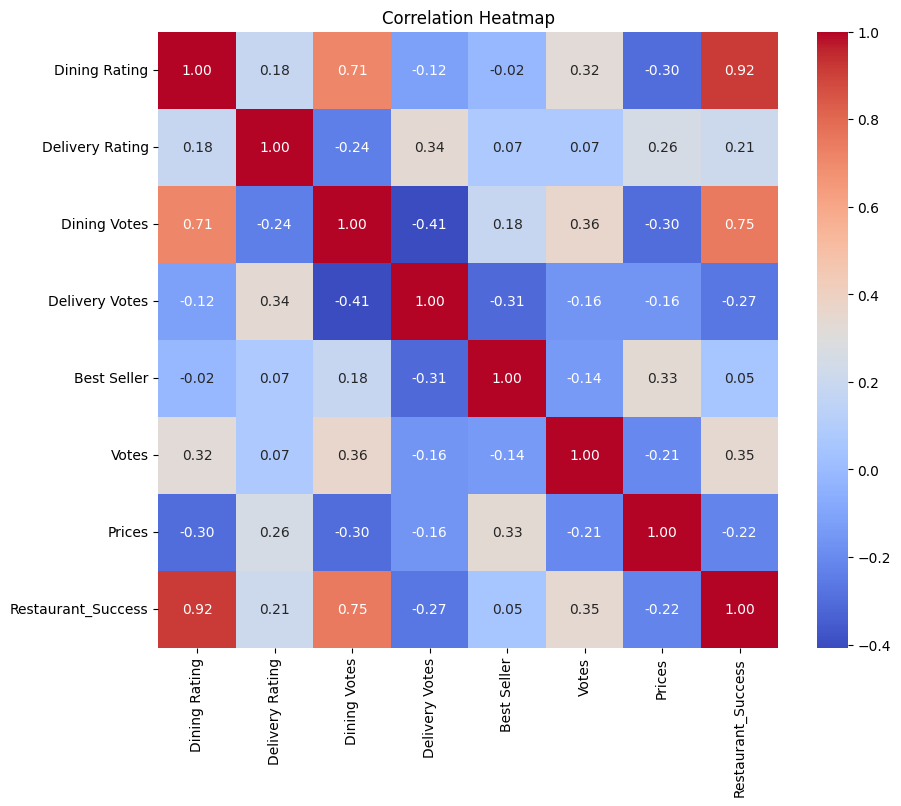

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Dessert = Dessert.drop(columns=['Restaurant Name', 'Cuisine ', 'Place Name', 'City', 'Item Name'], axis = 1)



corr_matrix  = Dessert.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


Pair Plot for the Entire Data Set

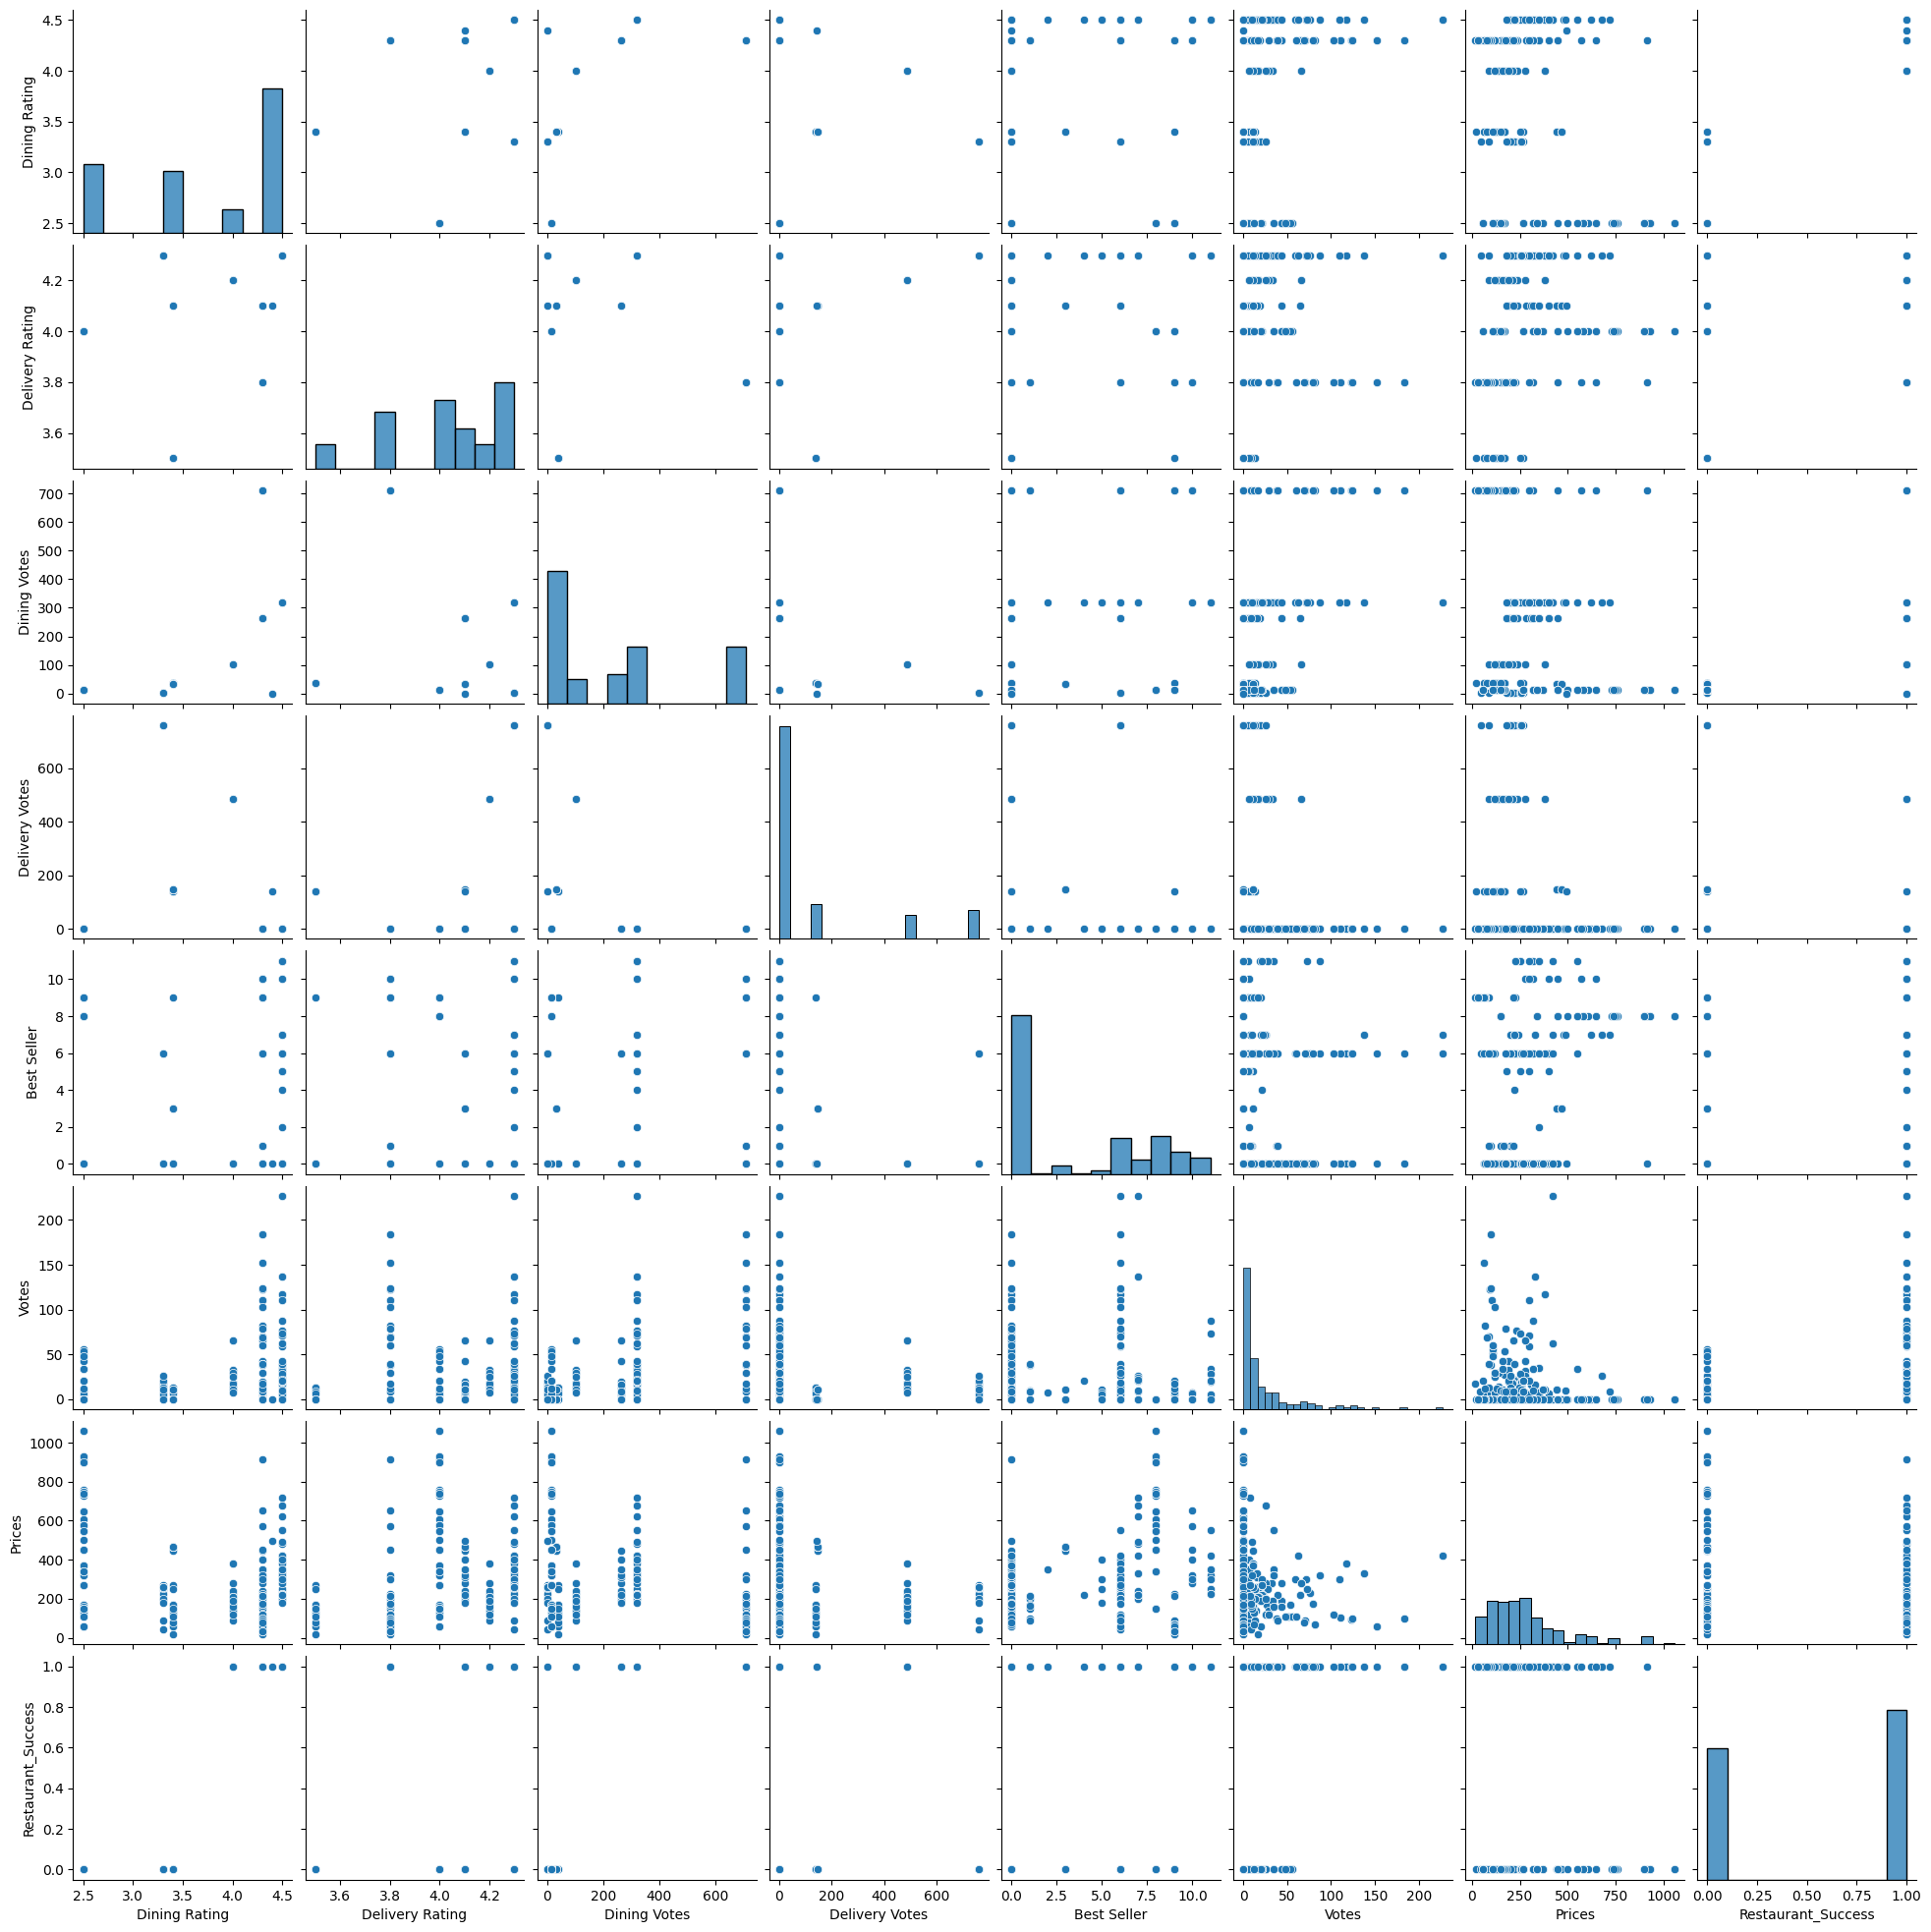

In [28]:
sns.pairplot(Dessert)
plt.show()